<a href="https://colab.research.google.com/github/luxizh/EE62_Select_topic_for_Computer_Vision_Colab/blob/master/with_is_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy as np
import tensorflow as tf

#EPOCHS = 30
#BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
 
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits 
  
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

#rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)  
loss_operation = tf.reduce_mean(cross_entropy)
#optimizer = tf.train.AdamOptimizer(learning_rate=rate)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=rate)
#training_operation = optimizer.minimize(loss_operation)

predictions_operation = tf.argmax(tf.nn.softmax(logits), 1)
correct_prediction = tf.equal(predictions_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    all_predictions = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, predictions = sess.run([accuracy_operation, predictions_operation], feed_dict={x: batch_x, y: batch_y})
        
        all_predictions = np.hstack((all_predictions, predictions))
        total_accuracy += (accuracy * len(batch_x))
    all_predictions = np.array(all_predictions)
    return total_accuracy / num_examples, all_predictions

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
BATCH_SIZE = 128
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph("./trained_cnn/lenet.meta")
    saver.restore(sess,tf.train.latest_checkpoint("./trained_cnn"))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./trained_cnn/lenet


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use keras.layers.conv2d instead.
epoch: 1/2 step: 50 d_loss: 0.505159, g

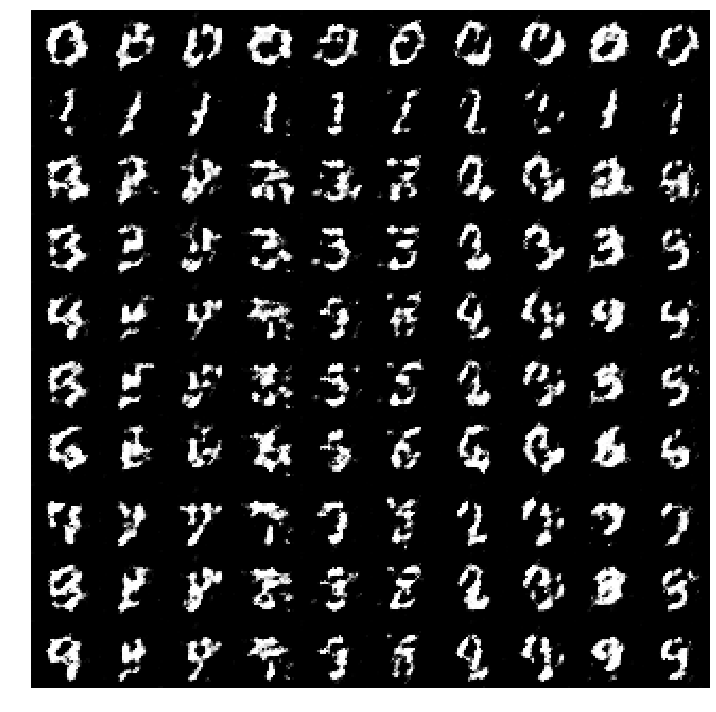

epoch: 1/2 mean d_loss: 0.892049, g_loss: 1.319620
epoch: 2/2 step: 900 d_loss: 0.946174, g_loss: 1.020324
epoch: 2/2 step: 950 d_loss: 0.967460, g_loss: 1.270406
epoch: 2/2 step: 1000 d_loss: 0.833742, g_loss: 1.407671
epoch: 2/2 step: 1050 d_loss: 0.866966, g_loss: 1.146603
epoch: 2/2 step: 1100 d_loss: 0.821370, g_loss: 1.291272
epoch: 2/2 step: 1150 d_loss: 0.857658, g_loss: 1.317566
epoch: 2/2 step: 1200 d_loss: 0.730857, g_loss: 1.521860
epoch: 2/2 step: 1250 d_loss: 0.838005, g_loss: 1.249628
epoch: 2/2 step: 1300 d_loss: 0.882973, g_loss: 1.168588
epoch: 2/2 step: 1350 d_loss: 0.909683, g_loss: 1.361553
epoch: 2/2 step: 1400 d_loss: 0.843556, g_loss: 1.394182
epoch: 2/2 step: 1450 d_loss: 0.889942, g_loss: 1.543659
epoch: 2/2 step: 1500 d_loss: 0.844978, g_loss: 1.589810
epoch: 2/2 step: 1550 d_loss: 0.810187, g_loss: 1.541705
epoch: 2/2 step: 1600 d_loss: 0.793207, g_loss: 1.397785
epoch: 2/2 step: 1650 d_loss: 0.858384, g_loss: 1.444204
epoch: 2/2 step: 1700 d_loss: 0.811831,

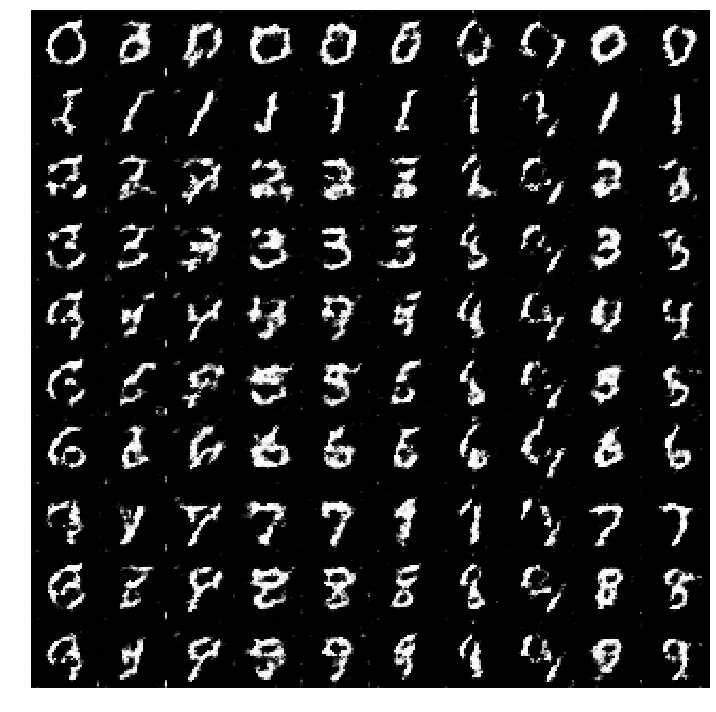

epoch: 2/2 mean d_loss: 0.853351, g_loss: 1.346039


In [0]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()

##################################################################
batch_size = 64
z_dim = 100
learning_rate_d = 0.0002
learning_rate_g = 0.0002
image_width = 32
image_height = 32
ndf = 16
ngf = 16
beta1 = 0.5
beta2 = 0.9
max_iter_step = 20000
channels = 1
log_path = './log_cgan'
ckpt_path = './ckpt_cgan'
ckpt_step_path = ckpt_path + '.step'
dataset = input_data.read_data_sets('MNIST_data', one_hot=True)
epochs=2
##################################################################


def get_batches():
    X, y = dataset.train.next_batch(batch_size)
    X = 2 * X - 1
    X = np.reshape(X, (-1, 28, 28))
    X = np.pad(X, pad_width=((0, 0), (2, 2), (2, 2)),
               mode='constant', constant_values=-1)
    X = np.expand_dims(X, -1)

    return X, y


def leaky_relu(x, leak=0.2, name='leaky_relu'):
    with tf.variable_scope(name):
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)
        return f1 * x + f2 * tf.abs(x)


def conv_cond_concat(x, y):
    x_shapes = x.get_shape()
    y_shapes = y.get_shape()

    return tf.concat([x, y * tf.ones([x_shapes[0], x_shapes[1], x_shapes[2], y_shapes[3]])], 3)


def generator(z, y, channels, training=True):
    with tf.variable_scope("generator", reuse=(not training)):
        # y_ = tf.reshape(y, shape=[batch_size, 1, 1, 10])
        z = tf.concat([z, y], axis=1)
        x = tf.layers.dense(z, 4 * 4 * ngf * 8)

        deconv1 = tf.reshape(x, (-1, 4, 4, ngf * 8))
        bn1 = tf.layers.batch_normalization(deconv1, training=training)
        relu1 = tf.nn.relu(bn1)
        # out1 = conv_cond_concat(relu1, y_)

        deconv2 = tf.layers.conv2d_transpose(
            relu1, ngf * 4, 3, strides=2, padding='SAME')
        bn2 = tf.layers.batch_normalization(deconv2, training=training)
        relu2 = tf.nn.relu(bn2)
        # out2 = conv_cond_concat(relu2, y_)

        deconv3 = tf.layers.conv2d_transpose(
            relu2, ngf * 2, 3, strides=2, padding='SAME')
        bn3 = tf.layers.batch_normalization(deconv3, training=training)
        relu3 = tf.nn.relu(bn3)
        # out3 = conv_cond_concat(relu3, y_)

        deconv4 = tf.layers.conv2d_transpose(
            relu3, ngf, 3, strides=2, padding='SAME')
        bn4 = tf.layers.batch_normalization(deconv4, training=training)
        relu4 = tf.nn.relu(bn4)
        # out4 = conv_cond_concat(relu4, y_)

        deconv5 = tf.layers.conv2d_transpose(
            relu4, channels, 3, strides=1, padding='SAME')
        out = tf.nn.tanh(deconv5)

        return out


def discriminator(image, y, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        y_ = tf.reshape(y, shape=(batch_size, 1, 1, 10))
        image = conv_cond_concat(image, y_)

        conv1 = tf.layers.conv2d(image, ndf, 3, strides=2, padding='SAME')
        lrelu1 = leaky_relu(conv1)
        # out1 = conv_cond_concat(lrelu1, y_)

        conv2 = tf.layers.conv2d(lrelu1, ndf * 2, 3, strides=2, padding='SAME')
        bn2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = leaky_relu(bn2)
        # out2 = conv_cond_concat(lrelu2, y_)

        conv3 = tf.layers.conv2d(lrelu2, ndf * 4, 3, strides=2, padding='SAME')
        bn3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = leaky_relu(bn3)
        # out3 = conv_cond_concat(lrelu3, y_)

        conv4 = tf.layers.conv2d(lrelu3, ndf * 8, 3, strides=1, padding='SAME')
        bn4 = tf.layers.batch_normalization(conv4, training=True)
        lrelu4 = leaky_relu(bn4)
        # out4 = conv_cond_concat(lrelu4, y_)

        flat = tf.reshape(lrelu4, [batch_size, -1])

        # flat = tf.concat([flat, y], axis=1)

        logits = tf.layers.dense(flat, 1)

        out = tf.sigmoid(logits)

        return out, logits


def model_inputs():
    inputs_real = tf.placeholder(tf.float32, shape=(
        batch_size, image_width, image_height, channels))
    inputs_y = tf.placeholder(tf.float32, shape=(batch_size, 10))
    inputs_z = tf.placeholder(tf.float32, shape=(batch_size, z_dim))

    return inputs_real, inputs_y, inputs_z


def model_loss(input_real, input_y, input_z):
    label_smoothing = 0.9

    g = generator(input_z, input_y, channels)
    d_real, d_logits_real = discriminator(input_real, input_y)
    d_fake, d_logits_fake = discriminator(g, input_y, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_real, labels=tf.ones_like(d_real) * label_smoothing))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_fake) * label_smoothing))

    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_fake) * label_smoothing))

    return d_loss, g_loss


def model_opt(d_loss, g_loss):
    d_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
    g_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt = tf.train.AdamOptimizer(
            learning_rate_d, beta1, beta2).minimize(d_loss, var_list=d_vars)
        g_opt = tf.train.AdamOptimizer(
            learning_rate_g, beta1, beta2).minimize(g_loss, var_list=g_vars)

    return d_opt, g_opt


def main():
    input_real, input_y, input_z = model_inputs()
    d_loss, g_loss = model_loss(input_real, input_y, input_z)
    d_opt, g_opt = model_opt(d_loss, g_loss)

    d_loss_sum = tf.summary.scalar("d_loss", d_loss)
    g_loss_sum = tf.summary.scalar("g_loss", g_loss)
    merged_all = tf.summary.merge_all()

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    summary_writer = tf.summary.FileWriter(log_path, tf.get_default_graph())

    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.gpu_options.per_process_gpu_memory_fraction = 0.9

    fixed_z = np.random.normal(0.0, 1.0, size=(batch_size, z_dim))

    with tf.Session(config=config) as sess:
        Epoch_D_train_losses=[]
        Epoch_G_train_losses=[]
        '''
        if os.path.isfile(ckpt_step_path):
            with open(ckpt_step_path, 'rb') as f:
                start_step = int(f.read())
            print('Training was interrupted. Continuing at step', start_step)
            saver.restore(sess, ckpt_path)
        else:
            start_step = 0
            sess.run(init)
        '''
        sess.run(init)
        step=0
        #sample_image_id = 0
        for epoch in range(epochs):
            D_train_losses=[]
            G_train_losses=[]
            for i in range(dataset.train.num_examples //batch_size):
                step+=1
                x, y = get_batches()
                z = np.random.normal(0.0, 1.0, size=(batch_size, z_dim))
                sess.run(d_opt, feed_dict={input_real: x, input_y: y, input_z: z})
                sess.run(g_opt, feed_dict={input_real: x, input_y: y, input_z: z})

                if step % 50 == 0:
                    d_loss_val, g_loss_val, merged_summary = sess.run([d_loss, g_loss, merged_all],
                                                                    feed_dict={input_real: x, input_y: y, input_z: z})
                    print('epoch: %d/%d step: %d d_loss: %f, g_loss: %f' %
                        (epoch+1, epochs, step, d_loss_val, g_loss_val))
                    summary_writer.add_summary(merged_summary, step)
                    D_train_losses.append(d_loss_val)
                    G_train_losses.append(g_loss_val)



            if (step != 0 and step % 500 == 0):
                saver.save(sess, ckpt_path)
                print('Save model at step', step)
                with open(ckpt_step_path, 'wb') as f:
                    f.write(b'%d' % (step + 1))
            
            overall = []
            G_y = tf.placeholder(tf.float32, shape=(None, 10))
            G_z = tf.placeholder(tf.float32, shape=(None, z_dim))
            g = generator(G_z, G_y, channels, training=False)
            for r in range(0, 10):
                y = np.zeros((batch_size, 10))
                y[:, r] = 1
                gen_images = g.eval(
                    feed_dict={G_z: fixed_z, G_y: y})
                temp = []
                for c in range(10):
                    temp.append(gen_images[c])
                overall.append(np.concatenate(temp, axis=1))
            res = np.concatenate(overall, axis=0)
            res = np.squeeze(res)
            plt.figure(figsize=[10, 10])
            plt.axis('off')
            res = 1 - (res + 1) / 2
            plt.imshow(res, cmap='binary')
            plt.tight_layout()
            plt.show()
            #plt.savefig('./result/%d.png' % sample_image_id, format='png', dpi=51.2)
            #print('Saving %d.png' % sample_image_id)
            plt.close('all')
            #sample_image_id += 1
            Epoch_D_train_losses.append(np.mean(D_train_losses))
            Epoch_G_train_losses.append(np.mean(G_train_losses))
            print('epoch: %d/%d mean d_loss: %f, g_loss: %f' %
                (epoch+1, epochs, np.mean(D_train_losses), np.mean(G_train_losses)))
            test_size=1000
            test_z = np.random.normal(0.0, 1.0, size=(test_size*10, z_dim))
            for r in range(0, 10):
                y_test = np.zeros((test_size*10, 10))
                test_label=np.zeros([test_size*10])
                y_test[r*test_size:(r+1)*test_size, r] = 1
                test_label[r*test_size:(r+1)*test_size]=r
            test_images = g.eval(
                feed_dict={G_z: test_z, G_y: y_test})
        #os.remove(ckpt_step_path)
        return Epoch_D_train_losses,Epoch_G_train_losses,test_images,test_label


if __name__ == '__main__':
    Epoch_D_train_losses,Epoch_G_train_losses,test_images,test_label=main()


In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph("./trained_cnn/lenet.meta")
    saver.restore(sess,tf.train.latest_checkpoint("./trained_cnn"))
    
    
    
    test_accuracy, test_predictions = evaluate(test_images, test_label)
    print(test_predictions)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

TypeError: ignored

In [0]:
class Predict:
    def __init__(self,test_images,test_label):
        self.graph=tf.Graph()#为每个类(实例)单独创建一个graph
        with self.graph.as_default():
             self.saver=tf.train.import_meta_graph("./trained_cnn/lenet.meta")#创建恢复器
        self.sess=tf.Session(graph=self.graph)#创建新的sess
        with self.sess.as_default():
            with self.graph.as_default():
                self.sess.run(tf.global_variables_initializer())
                self.saver.restore(self.sess,tf.train.latest_checkpoint("./trained_cnn"))#从恢复点恢复参数
                #test_accuracy, test_predictions = self.evaluate(test_images, test_label)
                #print(test_predictions)
                #print("Test Accuracy = {:.3f}".format(test_accuracy))
                self.x =  tf.placeholder(tf.float32, (None, 32, 32, 1))
                self.y =  tf.placeholder(tf.int32, (None))
                self.one_hot_y = tf.one_hot(y, 10)
                self.logits = self.LeNet(x)
                cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)  
                loss_operation = tf.reduce_mean(cross_entropy)
                predictions_operation = tf.argmax(tf.nn.softmax(self.logits), 1)
                correct_prediction = tf.equal(predictions_operation, tf.argmax(one_hot_y, 1))
                accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    def predict(self,test_images, test_label):
        with self.sess.as_default():
            test_accuracy, test_predictions = self.evaluate(test_images, test_label)
            print(test_predictions)
            print("Test Accuracy = {:.3f}".format(test_accuracy))
    def evaluate(self,X_data, y_data):
        with self.sess.as_default():
            num_examples = len(X_data)
            total_accuracy = 0
            #sess = tf.get_default_session()
            all_predictions = []
            for offset in range(0, num_examples, BATCH_SIZE):
                batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
                accuracy, predictions = sess.run([accuracy_operation, predictions_operation], feed_dict={x: batch_x, y: batch_y})

                all_predictions = np.hstack((all_predictions, predictions))
                total_accuracy += (accuracy * len(batch_x))
            all_predictions = np.array(all_predictions)
            return total_accuracy / num_examples, all_predictions
    def LeNet(self,x):    
        # Hyperparameters
        mu = 0
        sigma = 0.1
        with self.sess.as_default():
            with self.graph.as_default():
                # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
                conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6], mean = mu, stddev = sigma))
                conv1_b = tf.Variable(tf.zeros(6))
                conv1 = tf.nn.conv2d(x, conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 

                # Activation.
                conv1 = tf.nn.relu(conv1)

                # Pooling. Input = 28x28x6. Output = 14x14x6.
                pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

                # Layer 2: Convolutional. Output = 10x10x16.
                conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
                conv2_b = tf.Variable(tf.zeros(16))
                conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b

                # Activation.
                conv2 = tf.nn.relu(conv2)

                # Pooling. Input = 10x10x16. Output = 5x5x16.
                pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 

                # Flatten. Input = 5x5x16. Output = 400.
                fc1 = flatten(pool_2)

                # Layer 3: Fully Connected. Input = 400. Output = 120.
                fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
                fc1_b = tf.Variable(tf.zeros(120))
                fc1 = tf.matmul(fc1,fc1_w) + fc1_b

                # Activation.
                fc1 = tf.nn.relu(fc1)

                # Layer 4: Fully Connected. Input = 120. Output = 84.
                fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
                fc2_b = tf.Variable(tf.zeros(84))
                fc2 = tf.matmul(fc1,fc2_w) + fc2_b

                # Activation.
                fc2 = tf.nn.relu(fc2)

                # Layer 5: Fully Connected. Input = 84. Output = 10.
                fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
                fc3_b = tf.Variable(tf.zeros(10))
                logits = tf.matmul(fc2, fc3_w) + fc3_b
        return logits 

In [0]:
p=Predict(test_images, test_label)
p.predict(test_images, test_label)

INFO:tensorflow:Restoring parameters from ./trained_cnn/lenet


ValueError: ignored